 **About Dataset** :<br>
 <br>
 The dataset was developed by starting with satellite images of the ocean,
 someofwhichcontain an oil spill and some that do not.
 Images were split into sections and processed using computer vision
 algorithms to provide a vector of features to describe the contents of the
 image section or patch.
 The task is, given a vector that describes the contents of a patch of a satellite
 image, then predicts whether the patch contains an oil spill or not, e.g. from
 the illegal or accidental dumping of oil in the ocean.<br>
 <br>
 There are two classes and the goal is to distinguish between spill and
 non-spill using the features of a given ocean patch.<br>
 <br>
 ● **Non-Spill**: negative case, or majority class.<br>
 ● **OilSpill**: positive case, or minority class.<br>
 There are a total of 50 Columns in the Dataset, the output column is named as a target<br>

### Import libraries :

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

###  Load the Dataset


In [61]:
df= pd.read_csv('oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


### Data Cleaning and Pre-processing:

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [64]:
df.isnull().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

### Describe Database:

In [65]:
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


In [66]:
df.duplicated().sum()

0

In [70]:
df.dtypes

f_1         int64
f_2         int64
f_3       float64
f_4       float64
f_5         int64
f_6         int64
f_7       float64
f_8       float64
f_9       float64
f_10      float64
f_11      float64
f_12      float64
f_13      float64
f_14      float64
f_15      float64
f_16      float64
f_17      float64
f_18      float64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23        int64
f_24      float64
f_25      float64
f_26      float64
f_27      float64
f_28      float64
f_29      float64
f_30      float64
f_31      float64
f_32      float64
f_33      float64
f_34      float64
f_35        int64
f_36        int64
f_37      float64
f_38      float64
f_39        int64
f_40        int64
f_41      float64
f_42      float64
f_43      float64
f_44      float64
f_45      float64
f_46        int64
f_47      float64
f_48      float64
f_49      float64
target      int64
dtype: object

### Feuture Scalling:

In [71]:
features = df.loc[:,'f_2':'f_49']
# features
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)
df.loc[:, 'f_2':'f_49'] = scaled_features



C:\Users\Admin\AppData\Local\Temp\ipykernel_12512\3951132622.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'f_2':'f_49'] = scaled_features


### Correlation Analysis: 

In [72]:
correlation_metrix = df.corr()

In [73]:
correlation_metrix

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
f_1,1.000000,-0.155581,0.172017,-0.104116,-0.017025,-0.169533,-0.037412,-0.204983,-0.244551,-0.214447,...,-0.286190,-0.167466,-0.156916,-0.141792,-0.139478,-0.163693,-0.202983,0.294422,-0.253698,-0.180531
f_2,-0.155581,1.000000,0.058390,0.052638,-0.036870,0.953947,-0.136761,-0.016822,0.829978,0.128465,...,0.555154,0.777807,0.800939,0.716496,-0.080879,-0.048315,0.118792,-0.128222,0.139417,0.034128
f_3,0.172017,0.058390,1.000000,0.549510,-0.082764,0.050795,-0.627934,-0.349541,0.158686,0.073794,...,0.186920,0.178287,0.129653,0.176883,-0.088310,-0.182458,-0.022098,0.048291,0.162600,-0.035221
f_4,-0.104116,0.052638,0.549510,1.000000,0.048847,0.024693,-0.546205,-0.222063,0.097683,0.202167,...,-0.046934,0.032402,0.022234,0.000664,-0.220461,-0.204776,0.106758,-0.394081,0.476127,-0.050489
f_5,-0.017025,-0.036870,-0.082764,0.048847,1.000000,-0.028431,0.059128,0.123814,-0.047879,0.098573,...,-0.066930,-0.014877,-0.013742,-0.012346,-0.076695,-0.080136,0.070070,-0.135294,0.116896,-0.078598
f_6,-0.169533,0.953947,0.050795,0.024693,-0.028431,1.000000,-0.093589,-0.001395,0.894150,0.097449,...,0.594273,0.844597,0.868353,0.770044,-0.077783,-0.046834,0.126850,-0.058752,0.069731,0.049318
f_7,-0.037412,-0.136761,-0.627934,-0.546205,0.059128,-0.093589,1.000000,0.381206,-0.188076,-0.380340,...,-0.115014,-0.100003,-0.074308,-0.073751,0.077207,0.088633,-0.157243,0.483034,-0.612819,-0.026183
f_8,-0.204983,-0.016822,-0.349541,-0.222063,0.123814,-0.001395,0.381206,1.000000,0.001073,0.670628,...,0.013476,-0.015712,-0.013193,0.002439,-0.061639,-0.051879,-0.028117,-0.101155,0.033731,-0.014434
f_9,-0.244551,0.829978,0.158686,0.097683,-0.047879,0.894150,-0.188076,0.001073,1.000000,0.164098,...,0.675610,0.784833,0.770129,0.736075,-0.073312,-0.048994,0.102540,-0.080203,0.113389,0.076679
f_10,-0.214447,0.128465,0.073794,0.202167,0.098573,0.097449,-0.380340,0.670628,0.164098,1.000000,...,0.082449,0.052518,0.043116,0.042269,-0.113481,-0.095896,0.112275,-0.587156,0.603358,-0.013359


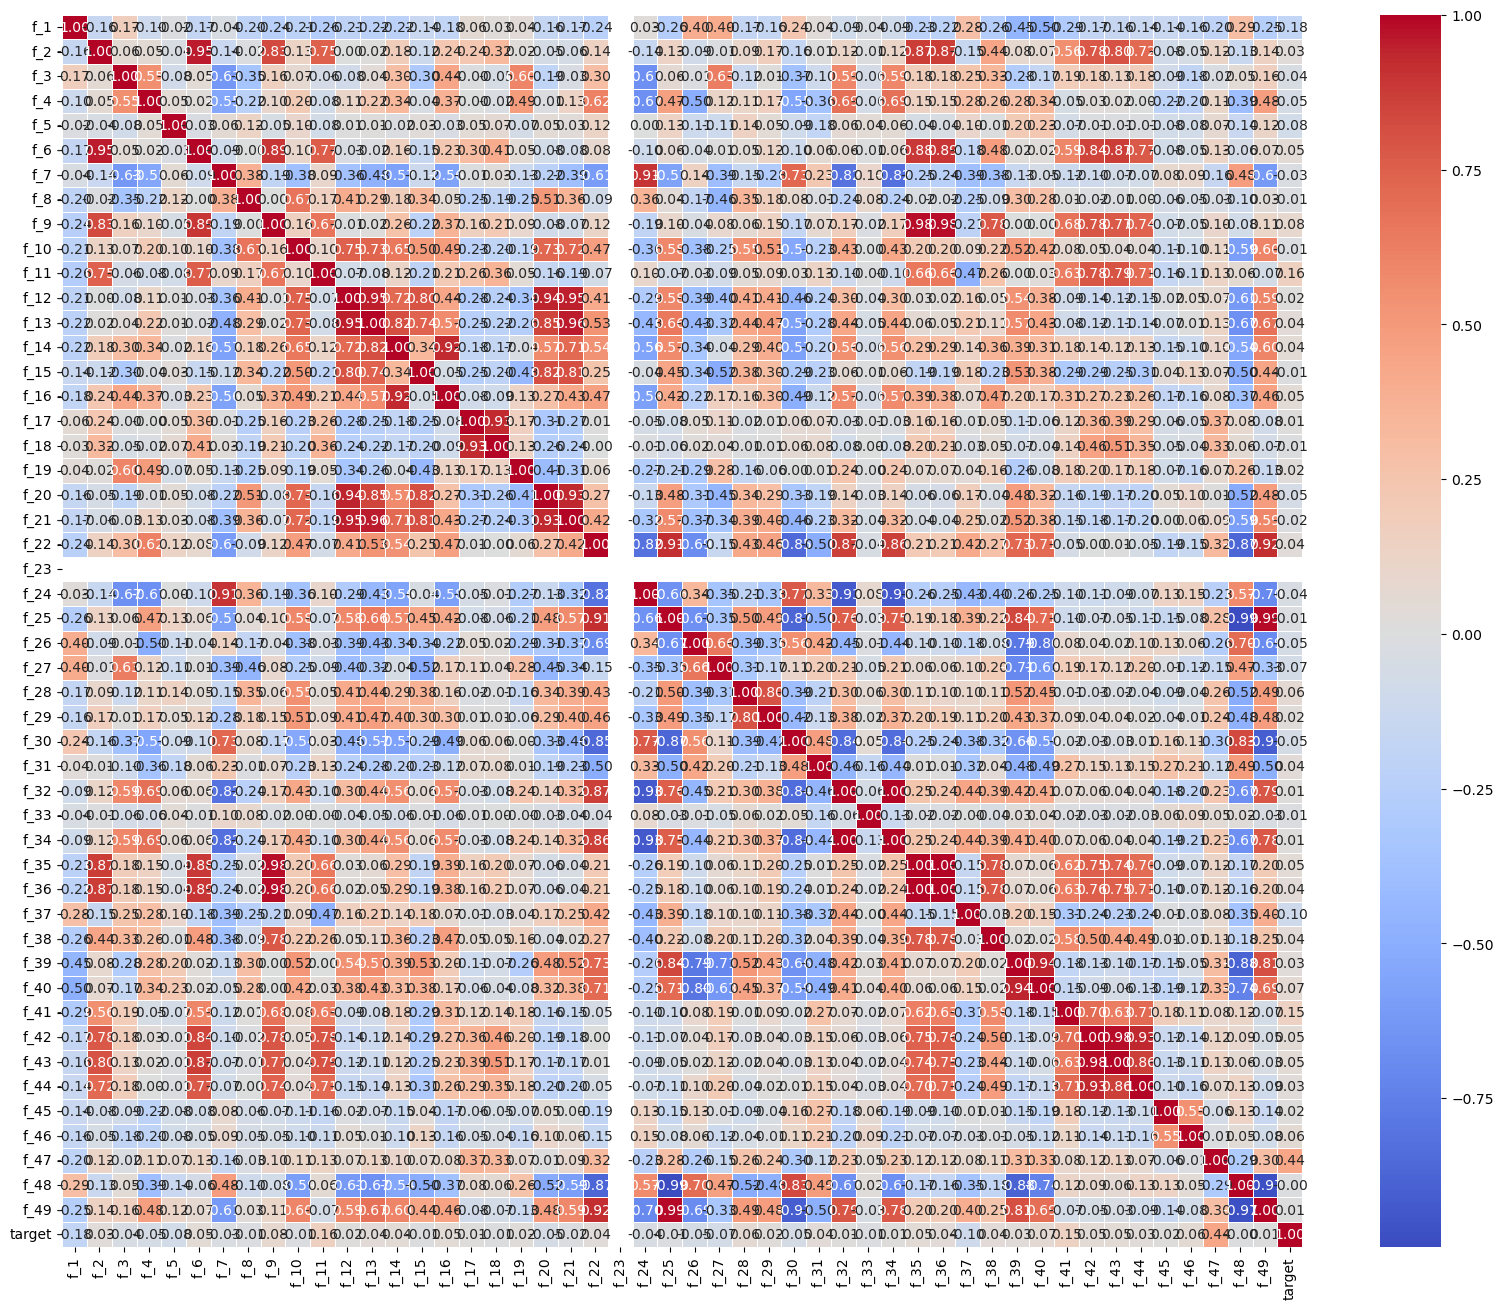

In [74]:
plt.figure(figsize = (20,16))
sns.heatmap(correlation_metrix, annot = True, cmap = 'coolwarm' , fmt = '.2f', linewidths= .5)
plt.show()

### Drop the column: 

In [78]:
df.drop(columns=['f_23'], inplace=True)

In [79]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29',
       'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38',
       'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47',
       'f_48', 'f_49', 'target'],
      dtype='object')

In [80]:
correlation_metrix = df.corr()

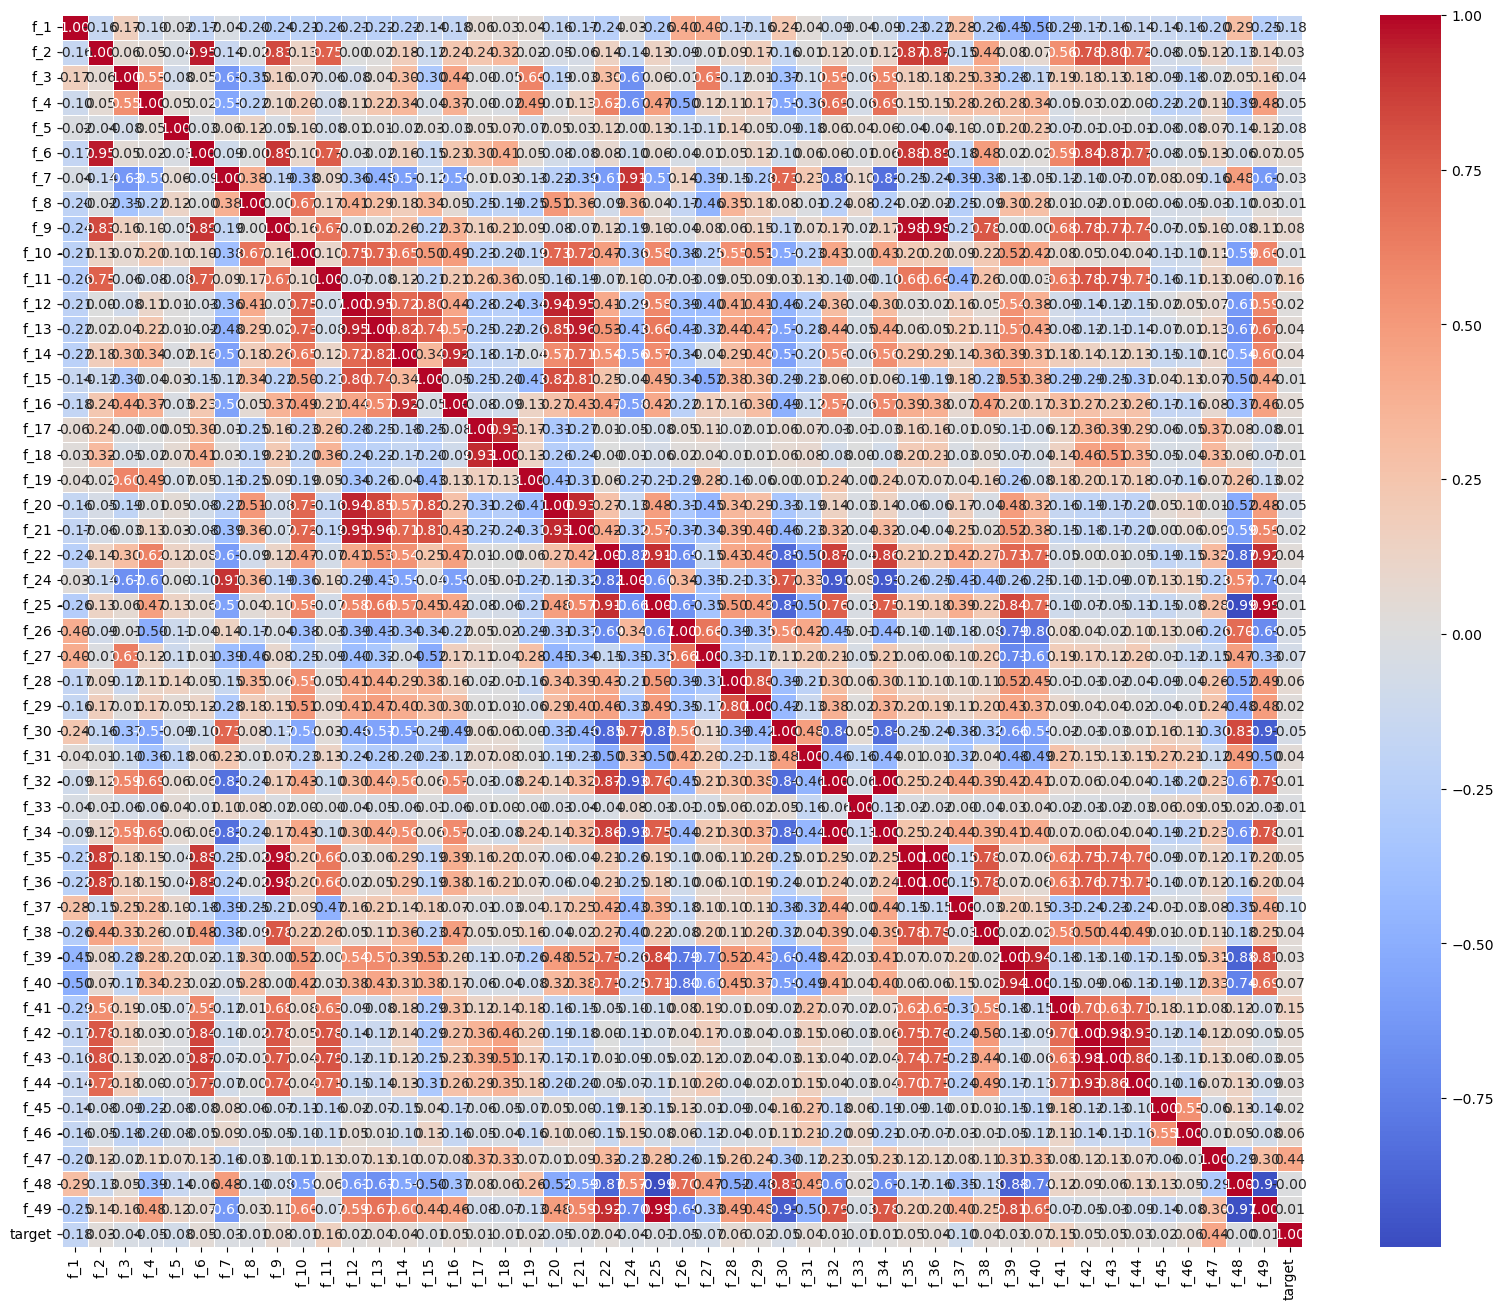

In [81]:
plt.figure(figsize = (20,16))
sns.heatmap(correlation_metrix, annot = True, cmap = 'coolwarm' , fmt = '.2f', linewidths= .5)
plt.show()

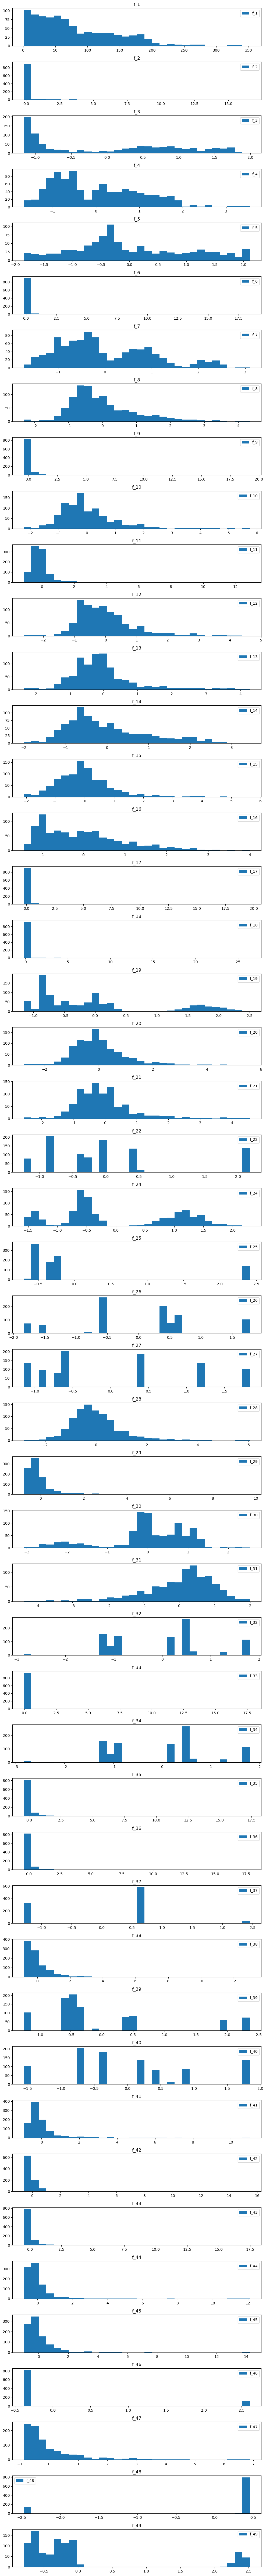

In [82]:
columns_of_interest = ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
                        'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
                        'f_20', 'f_21', 'f_22', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29',
                        'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38',
                        'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47',
                        'f_48', 'f_49']


fig, axes = plt.subplots(nrows=len(columns_of_interest), ncols=1, figsize=(10, 2 * len(columns_of_interest)))

for i, column in enumerate(columns_of_interest):
    df[column].plot(ax=axes[i], kind='hist', bins=30, legend=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjusting layout
plt.tight_layout()
plt.show()

In [83]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,1.152390,1.346434,-0.793007,0.129657,1.469091,-0.185871,-0.345107,3.165389,-0.343460,...,1.913877,0.800597,0.950757,0.216514,-0.255448,-0.383248,3.686767,0.388730,-0.058377,1
1,2,11.389546,-1.033273,-0.057342,2.114766,14.374844,0.618905,-2.207407,7.100184,-2.226754,...,4.810555,15.485710,17.486286,11.381341,-0.878152,-0.383248,6.362181,0.387769,-0.639664,0
2,3,-0.112818,1.252645,-0.502492,0.085544,-0.125929,-0.222058,-0.498440,-0.073589,-0.454242,...,0.465538,-0.248340,-0.197438,-0.449905,0.858654,2.609278,3.460466,0.395456,-0.096212,1
3,4,0.449611,1.440556,-1.101091,-0.399705,0.583114,-0.066295,-0.322804,1.725979,-0.343460,...,5.101741,0.467147,0.370349,0.286675,1.654442,2.609278,4.336762,0.382004,-0.017102,1
4,5,-0.010794,0.419520,-0.823188,-1.039352,0.002691,-0.142604,-0.584864,-0.072364,-0.565024,...,0.385669,0.395889,0.481449,0.022483,-0.484237,-0.383248,3.072971,0.381043,-0.264751,0


### Split the Data into Train and Test Sets

In [84]:
X = df.drop(columns=['target'])
y = df['target']

In [85]:
X_train, X_test, y_train,y_test = train_test_split(X,y ,test_size = 0.2, random_state = 42)

###  Model Selection and Training:

In [86]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Bagging and Ensemble Techniques:

In [87]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

###  Model Evaluation:

In [88]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

rf_accuracy = evaluate_model(rf_model, X_test, y_test)
ada_accuracy = evaluate_model(ada_model, X_test, y_test)


### Save and Load the Best Model:

In [90]:
best_model = rf_model if rf_accuracy > ada_accuracy else ada_model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

### Load the saved model:

In [91]:
loaded_model = joblib.load('best_model.pkl')

### Apply the Model to a Subset of Data:

In [92]:
subset_df = df.sample(n=20, random_state=42)
X_subset = subset_df.drop(columns=['target'])
y_subset_true = subset_df['target']
y_subset_pred = loaded_model.predict(X_subset)

### Display predictions on the subset data:

In [93]:
print("Predictions on Subset Data:")
print(y_subset_pred)

Predictions on Subset Data:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Analyze the characteristics of the subset data:

In [95]:
print("Subset Data Info:")
print(subset_df.info())



Subset Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 321 to 244
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     20 non-null     int64  
 1   f_2     20 non-null     float64
 2   f_3     20 non-null     float64
 3   f_4     20 non-null     float64
 4   f_5     20 non-null     float64
 5   f_6     20 non-null     float64
 6   f_7     20 non-null     float64
 7   f_8     20 non-null     float64
 8   f_9     20 non-null     float64
 9   f_10    20 non-null     float64
 10  f_11    20 non-null     float64
 11  f_12    20 non-null     float64
 12  f_13    20 non-null     float64
 13  f_14    20 non-null     float64
 14  f_15    20 non-null     float64
 15  f_16    20 non-null     float64
 16  f_17    20 non-null     float64
 17  f_18    20 non-null     float64
 18  f_19    20 non-null     float64
 19  f_20    20 non-null     float64
 20  f_21    20 non-null     float64
 21  f_22    20 non-null 

### Compare feature distributions between training and subset data:

In [94]:

print("\nTraining Data Describe:")
print(X_train.describe())
print("\nSubset Data Describe:")
print(X_subset.describe())





Training Data Describe:
              f_1         f_2         f_3         f_4         f_5         f_6  \
count  749.000000  749.000000  749.000000  749.000000  749.000000  749.000000   
mean    82.544726    0.019476   -0.001653   -0.001427   -0.026036    0.022394   
std     64.563112    1.103986    1.003222    1.006780    1.011358    1.110317   
min      1.000000   -0.167197   -1.161999   -1.664992   -1.855452   -0.182650   
25%     32.000000   -0.162018   -1.023017   -0.825101   -0.686443   -0.168367   
50%     65.000000   -0.139749   -0.015288   -0.247899   -0.267365   -0.154474   
75%    125.000000   -0.107640    0.875639    0.735508    0.659019   -0.119400   
max    352.000000   16.601603    1.818446    3.547380    2.114766   18.423439   

              f_7         f_8         f_9        f_10  ...        f_40  \
count  749.000000  749.000000  749.000000  749.000000  ...  749.000000   
mean     0.003833   -0.030967    0.018737   -0.029306  ...    0.005495   
std      1.008952    0.

### Analyze feature importance of the trained model:

In [96]:
if hasattr(loaded_model, 'feature_importances_'):
    feature_importance = loaded_model.feature_importances_
    print("\nFeature Importance:")
    for i, importance in enumerate(feature_importance):
        print(f"Feature {X_train.columns[i]}: {importance}")
else:
    print("The model does not support feature importance analysis.")


Feature Importance:
Feature f_1: 0.06281822414999656
Feature f_2: 0.019821470562562695
Feature f_3: 0.019501202791451514
Feature f_4: 0.03455306953609941
Feature f_5: 0.018332321495875964
Feature f_6: 0.02527086393365474
Feature f_7: 0.022456039846791957
Feature f_8: 0.022582236413578642
Feature f_9: 0.025628790818362734
Feature f_10: 0.0219858798777173
Feature f_11: 0.02595011178301022
Feature f_12: 0.016878204879060547
Feature f_13: 0.014379144251241332
Feature f_14: 0.016928888715298365
Feature f_15: 0.012609691320471583
Feature f_16: 0.023380394175093334
Feature f_17: 0.02392199288421556
Feature f_18: 0.017225081439483
Feature f_19: 0.0195702388954833
Feature f_20: 0.010105385431171218
Feature f_21: 0.01957605061545208
Feature f_22: 0.012141836290836728
Feature f_24: 0.02963551779408942
Feature f_25: 0.04612345388135315
Feature f_26: 0.005973005046845431
Feature f_27: 0.01345598943111321
Feature f_28: 0.01459216387138321
Feature f_29: 0.014493993554102011
Feature f_30: 0.026770857